In [1]:
import cv2
import json
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import glob
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm
import natsort

In [2]:
folder_name = 'TS_사고유형-E63_DATA2_낙하-OP'

In [ ]:
#get all the image list
image_list = glob.glob(folder_name+'\\*')
image_list[:5]

['TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000002.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000004.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000005.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000006.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000007.jpg']

In [26]:
image_list[0].split('''\\''')[-1][:33]

'E63_DATA2_OP_L1_D2023-08-30-13-30'

In [ ]:
#get the universal image names
image_list_2 = list(map(lambda x: x[:-15], image_list))
image_list_2[:5]

['TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30']

In [ ]:
# get the unique values to get the video names
video_list = list(map(lambda x: x.split('\\')[-1], np.unique(image_list_2)))
video_list

['E63_DATA2_OP_L1_D2023-08-30-13-30',
 'E63_DATA2_OP_L1_D2023-08-30-13-31',
 'E63_DATA2_OP_L1_D2023-08-30-13-32',
 'E63_DATA2_OP_L1_D2023-08-30-13-33',
 'E63_DATA2_OP_L1_D2023-08-30-14-19',
 'E63_DATA2_OP_L1_D2023-08-30-14-20',
 'E63_DATA2_OP_L1_D2023-08-30-14-21',
 'E63_DATA2_OP_L1_D2023-08-30-14-24',
 'E63_DATA2_OP_L1_D2023-08-30-14-26']

In [19]:
# create video for each unique image universal names
vd_img_list = glob.glob(folder_name+'\\'+video_list[0]+'*')
vd_img_list[:5]

['TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000002.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000004.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000005.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000006.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000007.jpg']

In [ ]:
#trying for one video file
vd_file_name = video_list[0]
size = (720, 480)

result = cv2.VideoWriter('videos\\'+vd_file_name+'.avi',  
                         cv2.VideoWriter_fourcc(*'MJPG'), 
                         30, size) 

vd_img_list = natsort.natsorted([x for x in image_list if vd_file_name in x])
print(f'creating video file for videos\\{vd_file_name}')

for img_dir in tqdm(vd_img_list):
    img = Image.open(img_dir)
    img = img.resize(size)
    img_array = np.array(img)

    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    result.write(img_array)

creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-13-30


100%|██████████| 479/479 [00:17<00:00, 26.94it/s]


In [21]:
# for all video file
for vd_file_name in video_list:
    size = (720, 480)

    result = cv2.VideoWriter('videos\\'+vd_file_name+'.avi',  
                            cv2.VideoWriter_fourcc(*'MJPG'), 
                            30, size) 

    vd_img_list = natsort.natsorted([x for x in image_list if vd_file_name in x])
    print(f'creating video file for videos\\{vd_file_name}')

    for img_dir in tqdm(vd_img_list):
        img = Image.open(img_dir)
        img = img.resize(size)
        img_array = np.array(img)

        img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
        result.write(img_array)

creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-13-30


100%|██████████| 479/479 [00:14<00:00, 32.52it/s]


creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-13-31


100%|██████████| 611/611 [00:18<00:00, 33.70it/s]


creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-13-32


100%|██████████| 534/534 [00:16<00:00, 32.90it/s]


creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-13-33


100%|██████████| 599/599 [00:27<00:00, 21.60it/s]


creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-14-19


100%|██████████| 407/407 [00:16<00:00, 24.05it/s]


creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-14-20


100%|██████████| 265/265 [00:10<00:00, 24.80it/s]


creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-14-21


100%|██████████| 305/305 [00:21<00:00, 14.30it/s]


creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-14-24


100%|██████████| 295/295 [00:23<00:00, 12.64it/s]


creating video file for videos\E63_DATA2_OP_L1_D2023-08-30-14-26


100%|██████████| 349/349 [00:18<00:00, 18.80it/s]


In [27]:
vd_file_name = video_list[0]
vd_img_list = natsort.natsorted([x for x in image_list if vd_file_name in x])
vd_img_list[:5]

['TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000002.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000004.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000005.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000006.jpg',
 'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000007.jpg']

In [28]:
vd_img_list[13]

'TS_사고유형-E63_DATA2_낙하-OP\\E63_DATA2_OP_L1_D2023-08-30-13-30_001_000019.jpg'

In [33]:
right_x, right_y, left_x, left_y = [472*2.66, 472*2.25, 363*2.66, 249*2.25]
xs = [left_x, right_x, right_x, left_x, left_x]
ys = [left_y, left_y, right_y, right_y, left_y]
right_x, right_y, left_x, left_y

(1255.52, 1062.0, 965.58, 560.25)

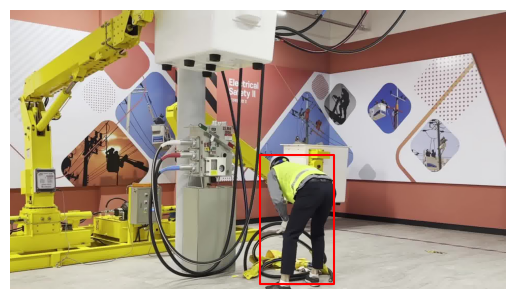

In [34]:
# Open the image file using PIL
img = Image.open(vd_img_list[13])

# Display the image using matplotlib
plt.figure()
plt.imshow(img)
plt.plot(xs, ys, color='r')
plt.axis('off')  # Optional: to hide the axes
plt.show()